## Show results - Test area (Zürich)

In [1]:
import numpy as np
import pandas as pd
#from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
import pickle
#import palettable (is not working...)
from scipy.sparse import csr_matrix, vstack
from scipy.optimize import curve_fit
import sys 
from netCDF4 import num2date, date2num
import xarray as xr
from netCDF4 import Dataset

sys.path.append('../../src/util')
sys.path.append('../../src/write_entities')

from climada.engine import Impact
from climada.entity import Exposures
from climada.hazard import Hazard

from stacked_grouped_barplot import plot_clustered_stacked
from stacked_grouped_barplot_error import plot_clustered_stacked_with_error
from define_exposures import call_exposures
from shapefile_masks import vector_shapefile_mask

fig_dir = '../figures/'

2020-09-15 15:45:26,474 - climada - DEBUG - Loading default config file: C:\Users\valen\Documents\GitHub\climada_python-1.4.2\climada\conf\defaults.conf


## Heat-related deaths for each scenario, year, and age category

In [2]:
#First we import and open the pickle file containing a dictionary of the impacts. 
#The dictionary is a nested dictionary, with the first layer being the different scenarios, 
#the second the years. For each scenario and each year, there is a panda dataframe 
#with the 2 types of exposures as columns, according to the age of the people (the different exposures).
#The rows of the panda dataframe correspond to the output of each Monte Carlo run.

pickle_in = \
open('../../output/impact_cantons/loss_all_age_groups_2mc_all_uncertainties_Zürich.pickle','rb')
deaths_ZH = pickle.load(pickle_in)  

# Add a column to each dataframe with the sum of all exposures for each Monte Carlo run.
for s_ in deaths_ZH:
    for y_ in deaths_ZH[s_]:     
        deaths_ZH[s_][y_]['total'] \
        = deaths_ZH[s_][y_][list(deaths_ZH[s_][y_].columns)].sum(axis=1)   

Text(0, 0.5, 'Annual Heat-related Deaths [#]')

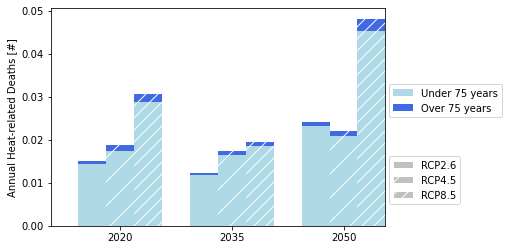

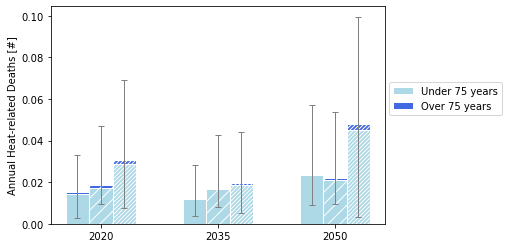

In [3]:
#We make a new dictionary of the scenarios, with the different types of exposures
#as columns and the years in the rows. Then, the clustered stacked barplots can be called, 
#with the dictionary of panda median as input, where the rows of each dataframe correspond to the grouping 
#criteria (by year), the columns to the stacks (the age categories), 
#and the dictionary keys to the hatches (the scenario).  

RCPs = {'RCP26':'RCP2.6','RCP45':'RCP4.5', 'RCP85':'RCP8.5'} #to get the correct name in the plots

median = {}
minimums = {}
maximums = {}

for s_ in deaths_ZH:
    median[RCPs[s_]] = pd.DataFrame()#dataframe containing the median realization for the different exposures
    maximums[RCPs[s_]] = pd.DataFrame() #dataframe containing the 95th percentile realization for the different exposures
    minimums[RCPs[s_]] = pd.DataFrame()#dataframe containing the 5th percentile realization for the different exposures
    
    for y_ in deaths_ZH[s_]:
        median[RCPs[s_]][y_] = ((deaths_ZH[s_][y_].iloc[:,0:-1]).median())
        maximums[RCPs[s_]][y_] = ((deaths_ZH[s_][y_].iloc[:,0:-1]).quantile(0.95))
        minimums[RCPs[s_]][y_] = ((deaths_ZH[s_][y_].iloc[:,0:-1]).quantile(0.05))
    
    median[RCPs[s_]] = median[RCPs[s_]].transpose()
    maximums[RCPs[s_]] = maximums[RCPs[s_]].transpose()
    minimums[RCPs[s_]] = minimums[RCPs[s_]].transpose()

fig, ax = plt.subplots()
plot_clustered_stacked(median, title = '', color = ['lightblue','royalblue'])
plt.ylabel('Annual Heat-related Deaths [#]')
ax.ticklabel_format(style = 'plain')

#plt.savefig(''.join([fig_dir,'loss_ch/predicted_loss_2020_2065.pdf']),bbox_inches='tight')

fig, ax = plt.subplots()
plot_clustered_stacked_with_error(median, minimums, maximums, color = ['lightblue','royalblue'])
plt.ylabel('Annual Heat-related Deaths [#]')

#plt.savefig(''.join([fig_dir,'loss_ch/predicted_loss_2020_2065_werror.pdf']),bbox_inches='tight')
